In [1]:
import sys,os,re
import numpy             as np
import matplotlib.pyplot as plt
import pandas            as pd
import seaborn           as sb

from theory_code.distance_theory import TheoryCalcs



from cobaya.run import run

from itertools import product
from copy      import deepcopy
from time      import time
from bios      import read

from scipy.interpolate import interp1d
from scipy.integrate   import trapezoid, cumtrapz

import warnings
warnings.filterwarnings('ignore')

import matplotlib
from matplotlib import rc
from matplotlib.pyplot import cm
from matplotlib.colors import LogNorm

rc('text', usetex=True)
rc('font', family='serif')
matplotlib.rcParams.update({'font.size': 18})


sidelegend = {'bbox_to_anchor': (1.04,0.5), 
              'loc': "center left",
              'frameon': False}

In [66]:
standard_params = {'cosmology': 'Standard',
                   'parameters':{'H0': 68.3,
                                 'omch2': 0.1116,
                                 'ombh2': 0.02237,
                                 'omk': 0.,
                                 'omnuh2': 0.0006442,
                                 'nnu': 3.}}

settings = {'zmin': 0.001,
            'zmax': 7.,
            'Nz': 10000}

SNmodel = {'model': 'constant',
           'MB': -19.2435}

fiducial = {'H0': 67.36,
            'omch2': 0.1116,
            'omk': 0.,
            'omnuh2': 0.0006442,
            'nnu': 3.}



In [68]:
fiducial['ombh2']=0.289*(fiducial['H0']/100.)**2-(fiducial['omch2']+fiducial['omnuh2'])
standard_params['parameters']['ombh2']     = fiducial['ombh2']

In [44]:
zcalc = np.linspace(settings['zmin'],settings['zmax'],settings['Nz'])

In [69]:
from theory_code.distance_theory import TheoryCalcs
dL_Standard = TheoryCalcs(settings,standard_params,SNmodel,fiducial,feedback=True).DL_EM(zcalc)
dA_Standard = TheoryCalcs(settings,standard_params,SNmodel,fiducial,feedback=True).dA(zcalc)


Selected cosmology: StandardExpansion
Basic cosmology done in 0.03 s

Selected cosmology: StandardExpansion
Basic cosmology done in 0.01 s


In [70]:
Hz_Standard = TheoryCalcs(settings,standard_params,SNmodel,fiducial,feedback=True).H_kmsMpc(zcalc)
comov_Standard = TheoryCalcs(settings,standard_params,SNmodel,fiducial,feedback=True).comov(zcalc)


Selected cosmology: StandardExpansion
Basic cosmology done in 0.03 s

Selected cosmology: StandardExpansion
Basic cosmology done in 0.01 s


In [57]:
fQ_params = {'cosmology': 'f_Q',
                   'parameters':{'omegam': 0.289,
                                'H0': 68.3,
                                'n': 1.,
                                'beta': 1.,
                                'ombh2': 0.02218,
                                'omch2': 0.12038}}

settings = {'zmin': 0.001,
            'zmax': 7.,
            'Nz': 10000}

SNmodel = {'model': 'constant',
           'MB': -19.2435}



In [58]:
beta = fQ_params['parameters']['beta']
n    = fQ_params['parameters']['n']

In [59]:
dL_mod = TheoryCalcs(settings,fQ_params,SNmodel,fiducial,feedback=True).DL_EM(zcalc)
dA_mod = TheoryCalcs(settings,fQ_params,SNmodel,fiducial,feedback=True).dA(zcalc)
Hz_mod = TheoryCalcs(settings,fQ_params,SNmodel,fiducial,feedback=True).H_kmsMpc(zcalc)
comov_mod = TheoryCalcs(settings,fQ_params,SNmodel,fiducial,feedback=True).comov(zcalc)


Selected cosmology: f_Q_Expansion
Basic cosmology done in 0.89 s

Selected cosmology: f_Q_Expansion
Basic cosmology done in 0.98 s

Selected cosmology: f_Q_Expansion
Basic cosmology done in 0.92 s

Selected cosmology: f_Q_Expansion
Basic cosmology done in 0.83 s


In [50]:
fQ_params['parameters']['omegam'] = 0.332
fQ_params['parameters']['H0']    = 65.5
dL_mod_omega = TheoryCalcs(settings,fQ_params,SNmodel,fiducial,feedback=True).DL_EM(zcalc)
dA_mod_omega = TheoryCalcs(settings,fQ_params,SNmodel,fiducial,feedback=True).dA(zcalc)
Hz_mod_omega = TheoryCalcs(settings,fQ_params,SNmodel,fiducial,feedback=True).H_kmsMpc(zcalc)
comov_mod_omega = TheoryCalcs(settings,fQ_params,SNmodel,fiducial,feedback=True).comov(zcalc)


Selected cosmology: f_Q_Expansion
Basic cosmology done in 1.07 s

Selected cosmology: f_Q_Expansion
Basic cosmology done in 0.84 s

Selected cosmology: f_Q_Expansion
Basic cosmology done in 0.83 s

Selected cosmology: f_Q_Expansion
Basic cosmology done in 0.83 s


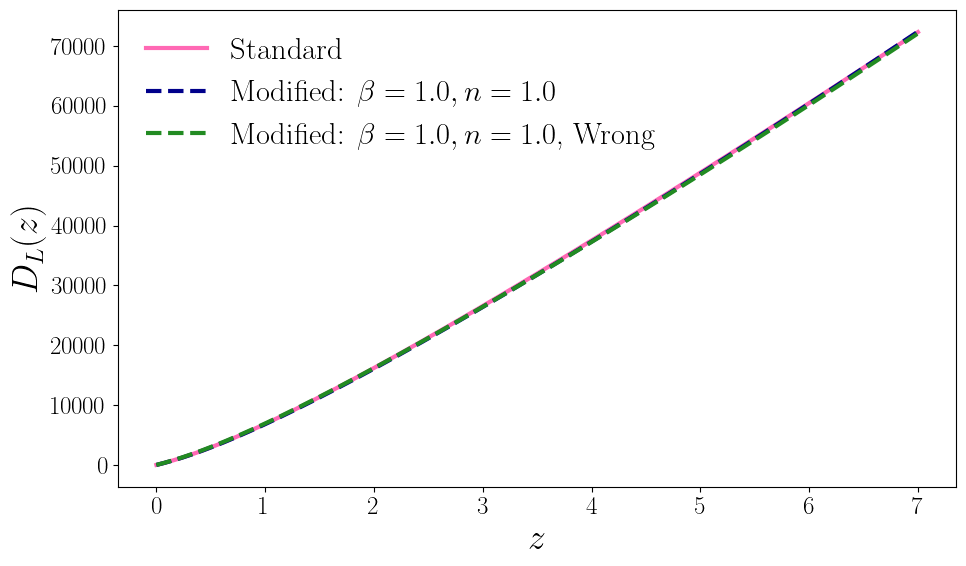

In [71]:
plt.figure(figsize=(10,6))


plt.plot(zcalc, dL_Standard, label='Standard', color='hotpink', linewidth=3)
plt.plot(zcalc, dL_mod, label=f'Modified: $\\beta={beta}, n={n}$',ls = '--',  color='darkblue', linewidth=3)
plt.plot(zcalc, dL_mod_omega, label=f'Modified: $\\beta={beta}, n={n}$, Wrong',ls = '--',  color='forestgreen', linewidth=3)

plt.xlabel('$z$', fontsize=26)
plt.ylabel('$D_L(z)$', fontsize=26)
plt.legend(frameon=False, fontsize=22, loc='upper left')


plt.tight_layout()

plt.show()



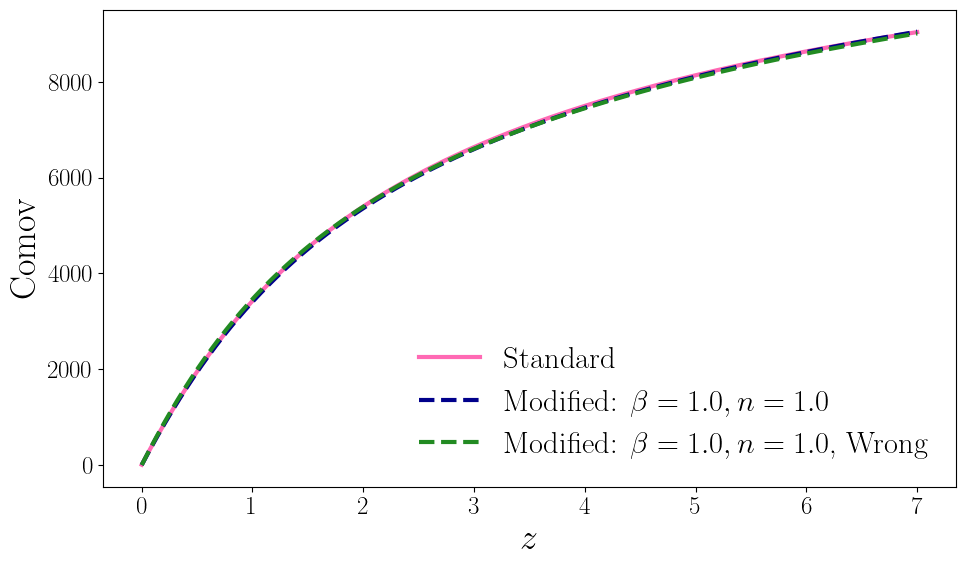

In [72]:
plt.figure(figsize=(10,6))
plt.plot(zcalc, comov_Standard, label='Standard', color='hotpink', linewidth=3)
plt.plot(zcalc, comov_mod, label=f'Modified: $\\beta={beta}, n={n}$',ls = '--',  color='darkblue', linewidth=3)
plt.plot(zcalc, comov_mod_omega, label=f'Modified: $\\beta={beta}, n={n}$, Wrong',ls = '--',  color='forestgreen', linewidth=3)

plt.xlabel('$z$', fontsize=26)
plt.ylabel('Comov', fontsize=26)
plt.legend(frameon=False, fontsize=22, loc='lower right')
plt.tight_layout()
plt.show()

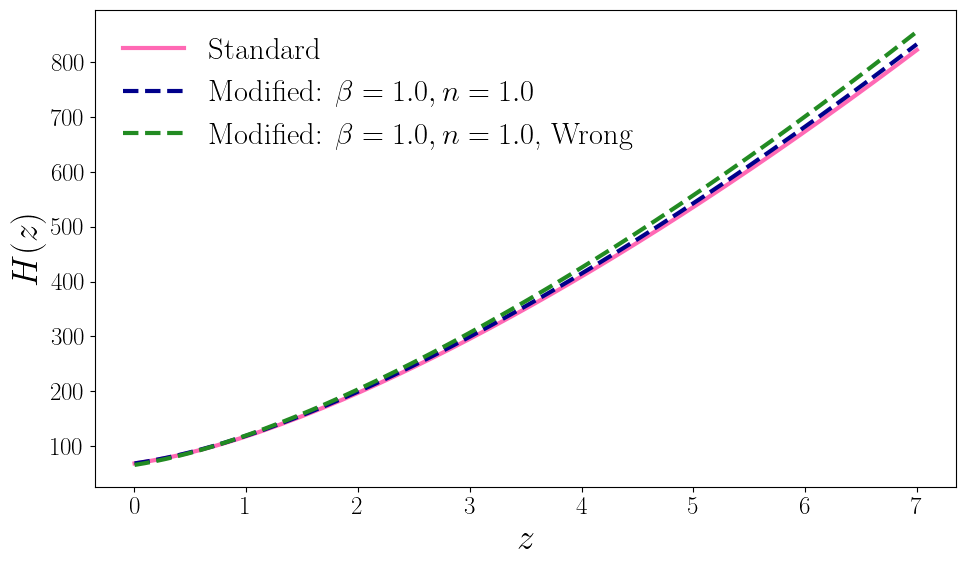

In [73]:
plt.figure(figsize=(10,6))


plt.plot(zcalc, Hz_Standard, label='Standard', color='hotpink', linewidth=3)
plt.plot(zcalc, Hz_mod, label=f'Modified: $\\beta={beta}, n={n}$',ls = '--',  color='darkblue', linewidth=3)
plt.plot(zcalc, Hz_mod_omega, label=f'Modified: $\\beta={beta}, n={n}$, Wrong',ls = '--',  color='forestgreen', linewidth=3)

plt.ylabel('$H(z)$', fontsize=26)
plt.xlabel('$z$', fontsize=26)

plt.legend(frameon=False, fontsize=22, loc='upper left')


plt.tight_layout()

plt.show()


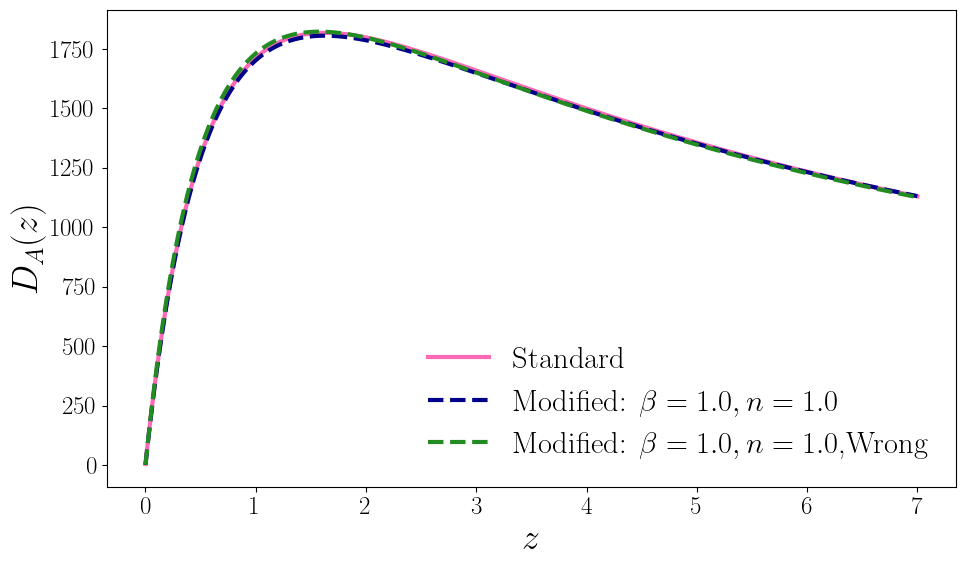

In [74]:
plt.figure(figsize=(10,6))


plt.plot(zcalc, dA_Standard, label='Standard', color='hotpink', linewidth=3)
plt.plot(zcalc, dA_mod, label=f'Modified: $\\beta={beta}, n={n}$',ls = '--',  color='darkblue', linewidth=3)
plt.plot(zcalc, dA_mod_omega, label=f'Modified: $\\beta={beta}, n={n}$,Wrong',ls = '--',  color='forestgreen', linewidth=3)

plt.xlabel('$z$', fontsize=26)
plt.ylabel('$D_A(z)$', fontsize=26)
plt.legend(frameon=False, fontsize=22, loc='lower right')


plt.tight_layout()

plt.show()



## $\chi^2$ test

In [15]:
info = {}

In [16]:
from likelihood.handler import LikelihoodHandler

like = {'SN_data': {'path': 'data/Pantheon',
                    'use_Pantheon': True,
                    'calibration': 'Marginalized'}}

LikeSets = LikelihoodHandler(like)
info['likelihood'] = LikeSets.like_dict
print(info['likelihood'])


LOADING SN DATA

{'calibration': 'Marginalized', 'path': 'data/Pantheon', 'use_Pantheon': True}

Using the SN likelihood analytically marginalized for H0 and MB.
WARNING! If you have these parameters free to vary, you will get no information coming from SN

{'SNlike': {'external': <class 'likelihood.SN_likelihood.SNLike'>, 'SN_data_path': 'data/Pantheon', 'use_Pantheon': True, 'calibration': 'Marginalized'}}


In [17]:
from theory_code.handler import TheoryHandler
theory = {'cosmology': 'Standard',
          'fiducial_path': None,
          'DDR_options': None}

info['theory'] = TheoryHandler(theory).theory_dict

In [18]:
preinfo = read('./settings/Standard/Pantheon.yaml')

info['params'] = preinfo['params']
print(info)

{'likelihood': {'SNlike': {'external': <class 'likelihood.SN_likelihood.SNLike'>, 'SN_data_path': 'data/Pantheon', 'use_Pantheon': True, 'calibration': 'Marginalized'}}, 'theory': {'CalcDist': {'external': <class 'theory_code.cobaya_theory_wrapper.CalcDist'>, 'cosmology': 'Standard', 'fiducial': None, 'DDR_options': None, 'derived_pars': ['rdrag', 'omegaL']}}, 'params': {'omegam': {'latex': '\\Omega_\\mathrm{m}', 'prior': {'min': 0.001, 'max': 0.99}, 'proposal': 0.05, 'ref': {'dist': 'norm', 'loc': 0.3, 'scale': 0.01}, 'drop': True}, 'H0': 67.0, 'omch2': {'value': 'lambda omegam, ombh2, omnuh2, H0: omegam*(H0/100)**2-ombh2-omnuh2', 'latex': '\\Omega_\\mathrm{c} h^2'}, 'ombh2': 0.02218, 'MB': -19.2435, 'omk': 0.0, 'w': -1.0, 'wa': 0.0, 'nnu': 3.0, 'omnuh2': 0.0006442, 'rdrag': {'latex': 'r_\\mathrm{d}', 'derived': True}, 'omegaL': {'latex': '\\Omega_\\Lambda', 'derived': True}}}


In [19]:
omegam_grid = np.linspace(0.1,0.6,100)


In [20]:
chi2_standard = []
for ind,omegam in enumerate(omegam_grid):
    print('')
    print('Test point {}/{}'.format(ind+1,len(omegam_grid)))
    info['sampler'] = {'evaluate': {'override': {'omegam': omegam}}}
    update_info,sampler = run(info)
    chi2_standard.append(-2*sampler.logposterior.loglike)



Test point 1/100
Using mB with free MB
[evaluate] Initialized!
[evaluate] Looking for a reference point with non-zero prior.
[evaluate] Reference point:
   omegam = 0.1
[evaluate] Evaluating prior and likelihoods...
[evaluate] log-posterior  = -580.444
[evaluate] log-prior      = 0.0110609
[evaluate]    logprior_0 = 0.0110609
[evaluate] log-likelihood = -580.455
[evaluate]    chi2_SNlike = 1160.91
[evaluate] Derived params:
[evaluate]    omch2 = 0.0220658
[evaluate]    rdrag = 186.446
[evaluate]    omegaL = 0.89992

Test point 2/100
Using mB with free MB
[evaluate] Initialized!
[evaluate] Looking for a reference point with non-zero prior.
[evaluate] Reference point:
   omegam = 0.105051
[evaluate] Evaluating prior and likelihoods...
[evaluate] log-posterior  = -576.709
[evaluate] log-prior      = 0.0110609
[evaluate]    logprior_0 = 0.0110609
[evaluate] log-likelihood = -576.72
[evaluate]    chi2_SNlike = 1153.44
[evaluate] Derived params:
[evaluate]    omch2 = 0.024333
[evaluate]    

In [21]:
theory = {'cosmology': 'f_Q',
          'fiducial_path': None,
          'DDR_options': None}

info['theory'] = TheoryHandler(theory).theory_dict

In [22]:
preinfo = read('./settings/fQ/Pantheon.yaml')

info['params'] = preinfo['params']
print(info)

{'likelihood': {'SNlike': {'external': <class 'likelihood.SN_likelihood.SNLike'>, 'SN_data_path': 'data/Pantheon', 'use_Pantheon': True, 'calibration': 'Marginalized'}}, 'theory': {'CalcDist': {'external': <class 'theory_code.cobaya_theory_wrapper.CalcDist'>, 'cosmology': 'f_Q', 'fiducial': None, 'DDR_options': None, 'derived_pars': ['rdrag', 'omegaL']}}, 'params': {'omegam': {'latex': '\\Omega_\\mathrm{m}', 'prior': {'min': 0.001, 'max': 0.99}, 'proposal': 0.05, 'ref': {'dist': 'norm', 'loc': 0.3, 'scale': 0.01}}, 'H0': 67.0, 'omch2': {'value': 'lambda omegam, ombh2, omnuh2, H0: omegam*(H0/100)**2-ombh2-omnuh2', 'latex': '\\Omega_\\mathrm{c} h^2'}, 'ombh2': 0.02218, 'MB': -19.2435, 'omnuh2': 0.0006442, 'n': 1.0, 'beta': 1.0, 'rdrag': {'latex': 'r_\\mathrm{d}', 'derived': True}, 'omegaL': {'latex': '\\Omega_\\Lambda', 'derived': True}}, 'sampler': {'evaluate': {'override': {'omegam': 0.6}}}}


In [23]:
chi2_fQ = []
for ind,omegam in enumerate(omegam_grid):
    print('')
    print('Test point {}/{}'.format(ind+1,len(omegam_grid)))
    info['sampler'] = {'evaluate': {'override': {'omegam': omegam}}}
    update_info,sampler = run(info)
    chi2_fQ.append(-2*sampler.logposterior.loglike)


Test point 1/100
Using mB with free MB
[evaluate] Initialized!
[evaluate] Looking for a reference point with non-zero prior.
[evaluate] Reference point:
   omegam = 0.1
[evaluate] Evaluating prior and likelihoods...
[evaluate] log-posterior  = -621.87
[evaluate] log-prior      = 0.0110609
[evaluate]    logprior_0 = 0.0110609
[evaluate] log-likelihood = -621.881
[evaluate]    chi2_SNlike = 1243.76
[evaluate] Derived params:
[evaluate]    omch2 = 0.0220658
[evaluate]    rdrag = 192.833
[evaluate]    omegaL = 0.9

Test point 2/100
Using mB with free MB
[evaluate] Initialized!
[evaluate] Looking for a reference point with non-zero prior.
[evaluate] Reference point:
   omegam = 0.105051
[evaluate] Evaluating prior and likelihoods...
[evaluate] log-posterior  = -617.349
[evaluate] log-prior      = 0.0110609
[evaluate]    logprior_0 = 0.0110609
[evaluate] log-likelihood = -617.361
[evaluate]    chi2_SNlike = 1234.72
[evaluate] Derived params:
[evaluate]    omch2 = 0.024333
[evaluate]    rdra

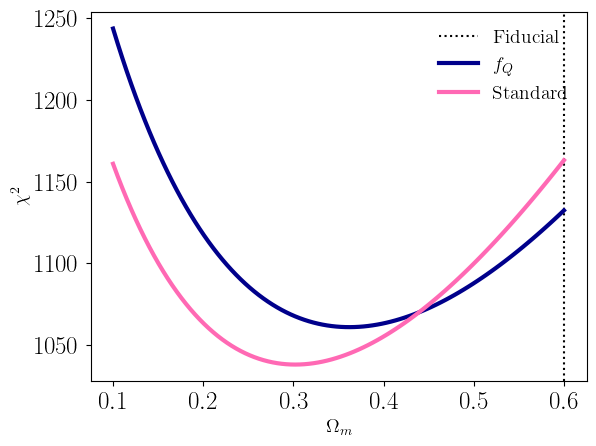

In [24]:
plt.axvline(x=omegam, color='black', ls=':', label='Fiducial')    
plt.plot(omegam_grid, chi2_fQ, color='darkblue', lw=3, label='$f_Q$')   
plt.plot(omegam_grid, chi2_standard, color='hotpink', lw=3, label='Standard')         
plt.xlabel(r'$\Omega_m$', fontsize=14)
plt.ylabel(r'$\chi^2$', fontsize=14)
plt.legend(frameon=False, fontsize=14, loc='upper right')
plt.show();


## Reproducing results of arxiv:2210.11935

In [25]:
from getdist import plots
from getdist import plots,loadMCSamples,MCSamples
from getdist.gaussian_mixtures import GaussianND
from analysis.chains_analysis import Analyzer

In [26]:
analysis_settings = {'Metropolis-Hastings': {'ignore_rows': 0.3},
                     'Nautilus': {}}

In [27]:
fiducial_Rocco = { 'H0': 69.15,
            'omegam': 0.296  }

In [28]:
fiducial_Pantheon = {
            'omegaL': 0.702,
            'omegam': 0.298 ,
           }

In [29]:
stats = Analyzer(fiducial_Rocco)


## CC

In [30]:
CC = {
    'Standard': {'path':'./chains/standard/LCDM_CC',
                                        'Nchains':1,
                                        'temperature' : 1,
                                        'sampler': 'MH',
                                        'color': 'hotpink',
                                        'filled': True},
    r'$f_Q$': {'path':'./chains/fQ/fQ_CC',
                                        'Nchains':1,
                                        'temperature' : 1,
                                        'sampler': 'MH',
                                        'color': 'mediumseagreen',
                                        'filled': True},

        }

In [31]:
analyzed_results_CC = {name: stats.analyze_chain(name,resdict, print_bounds=True, feedback=True) for name,resdict in CC.items()}



 Analyzing Standard 
Single chain, no R-1 computed. Trust Cobaya and hope for the best
\begin{tabular} { l  c}

 Parameter &  68\% limits\\
\hline
{\boldmath$\Omega_\mathrm{m}$} & $0.262\pm 0.031            $\\

{\boldmath$H_0            $} & $70.2\pm 2.3               $\\

$\Omega_\mathrm{c} h^2     $ & $0.1054\pm 0.0083          $\\

$r_\mathrm{d}              $ & $151.7^{+2.2}_{-2.5}       $\\

$\Omega_\Lambda            $ & $0.738\pm 0.031            $\\

$\chi^2                    $ & $21.6\pm 2.1               $\\

$\chi^2_\mathrm{CCLike}    $ & $21.6\pm 2.1               $\\
\hline
\end{tabular}
no .minimum file available for Standard. Switching to best sample

 Analyzing $f_Q$ 
Single chain, no R-1 computed. Trust Cobaya and hope for the best
\begin{tabular} { l  c}

 Parameter &  68\% limits\\
\hline
{\boldmath$\Omega_\mathrm{m}$} & $0.260^{+0.026}_{-0.033}   $\\

{\boldmath$H_0            $} & $70.3\pm 2.3               $\\

$\Omega_\mathrm{c} h^2     $ & $0.1048^{+0.0072}_{

In [32]:
plot_pars = ['H0', 'omegam']

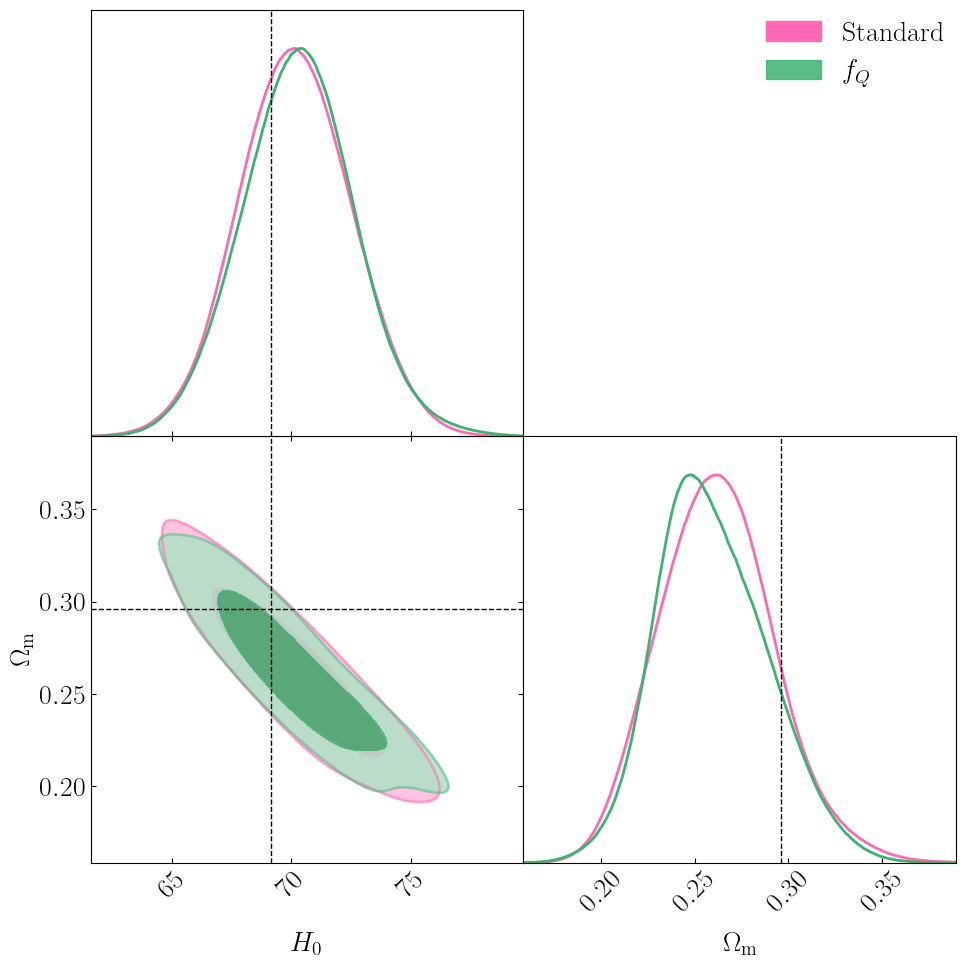

In [33]:
g = plots.get_subplot_plotter(subplot_size=1,width_inch=10, scaling=False)
g.settings.figure_legend_frame = False
g.settings.axes_fontsize=20
g.settings.axes_labelsize=20
g.settings.legend_fontsize=20
g.settings.axis_marker_color = 'black'
g.settings.axis_marker_ls = '--'
g.settings.axis_marker_lw = 1
g.settings.axis_tick_x_rotation = 45
g.triangle_plot([result['sample'] for result in analyzed_results_CC.values()], plot_pars,
    filled=[result['filled'] for result in analyzed_results_CC.values()],
    legend_loc='upper right',
    legend_labels=[result for result in analyzed_results_CC.keys()],
    contour_colors=[result['color'] for result in analyzed_results_CC.values()],
    contour_lws=2,
    markers={k:v for k,v in fiducial_Rocco.items()})    
g.fig.align_ylabels()
g.fig.align_xlabels();
plt.show()

## Pantheon

In [94]:
Pantheon = {
    'Standard': {'path':'./chains/standard/LCDM_Pantheon',
                                        'Nchains':1,
                                        'temperature' : 1,
                                        'sampler': 'MH',
                                        'color': 'hotpink',
                                        'filled': True},
    r'$f_Q$': {'path':'./chains/fQ/fQ_Pantheon',
                                        'Nchains':1,
                                        'temperature' : 1,
                                        'sampler': 'MH',
                                        'color': 'mediumseagreen',
                                        'filled': True},
    r'$f_Q$ CANDI': {'path':'/Users/chiaradeleo/Desktop/CANDI/chains/fQ/fQ_Pantheon',
                                        'Nchains':1,
                                        'temperature' : 1,
                                        'sampler': 'MH',
                                        'color': 'darkorange',
                                        'filled': True},


        }

In [95]:
analyzed_results_Pantheon = {name: stats.analyze_chain(name,resdict, print_bounds=True, feedback=True) for name,resdict in Pantheon.items()}
plot_pars = ['omegaL', 'omegam']


 Analyzing Standard 
Single chain, no R-1 computed. Trust Cobaya and hope for the best
[root] *WARNING* auto bandwidth for chi2 very small or failed (h=0.000681751918535653,N_eff=366.3712342079689). Using fallback (h=0.005938345956381146)
\begin{tabular} { l  c}

 Parameter &  68\% limits\\
\hline
{\boldmath$\Omega_\mathrm{m}$} & $0.304\pm 0.022            $\\

$\Omega_\mathrm{c} h^2     $ & $0.141\pm 0.012            $\\

$r_\mathrm{d}              $ & $142.4\pm 2.8              $\\

$\Omega_\Lambda            $ & $0.696\pm 0.022            $\\

$\chi^2                    $ & $1038.9\pm 1.5             $\\

$\chi^2_\mathrm{SNLike}    $ & $1038.9\pm 1.5             $\\
\hline
\end{tabular}
no .minimum file available for Standard. Switching to best sample

 Analyzing $f_Q$ 
Single chain, no R-1 computed. Trust Cobaya and hope for the best
[root] *WARNING* auto bandwidth for chi2 very small or failed (h=0.0011150114668965622,N_eff=350.40596572879207). Using fallback (h=0.007319185482291

[root] *WARNING* Parameters are 100% correlated: omegaL, omegam
[root] *WARNING* Parameters are 100% correlated: omegaL, omegam
[root] *WARNING* Parameters are 100% correlated: omegaL, omegam


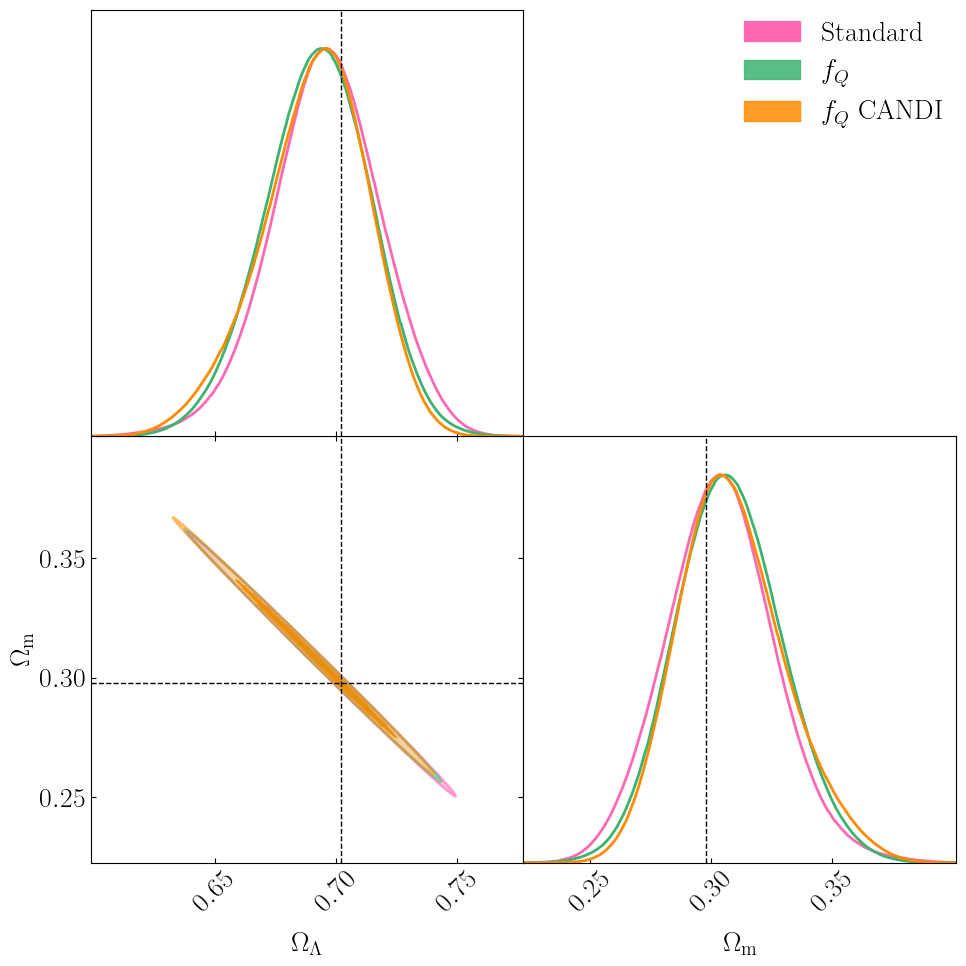

In [96]:
g = plots.get_subplot_plotter(subplot_size=1,width_inch=10, scaling=False)
g.settings.figure_legend_frame = False
g.settings.axes_fontsize=20
g.settings.axes_labelsize=20
g.settings.legend_fontsize=20
g.settings.axis_marker_color = 'black'
g.settings.axis_marker_ls = '--'
g.settings.axis_marker_lw = 1
g.settings.axis_tick_x_rotation = 45
g.triangle_plot([result['sample'] for result in analyzed_results_Pantheon.values()], plot_pars,
    filled=[result['filled'] for result in analyzed_results_Pantheon.values()],
    legend_loc='upper right',
    legend_labels=[result for result in analyzed_results_Pantheon.keys()],
    contour_colors=[result['color'] for result in analyzed_results_Pantheon.values()],
    contour_lws=2,
    markers={k:v for k,v in fiducial_Pantheon.items()})    
g.fig.align_ylabels()
g.fig.align_xlabels();
plt.show()

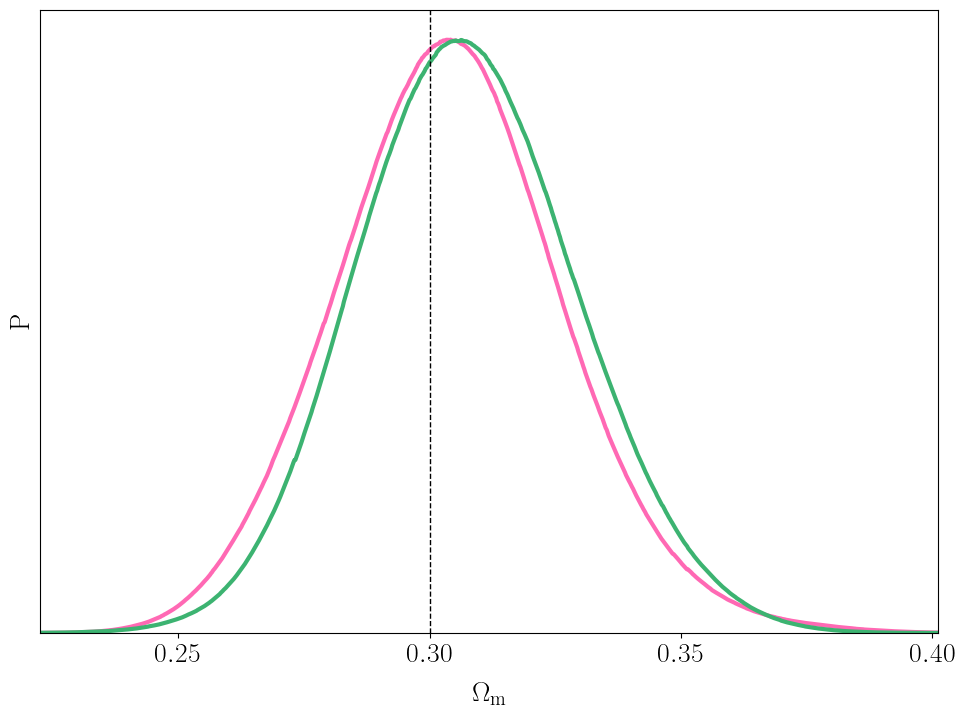

In [85]:
g = plots.get_single_plotter(width_inch=10)
g.settings.axes_fontsize = 20
g.settings.axes_labelsize = 20
g.plot_1d(
    [result['sample'] for result in analyzed_results_Pantheon.values()],
    'omegam',
    colors=[result['color'] for result in analyzed_results_Pantheon.values()],
    normalized=True,
    lws=3,
    smooth_scale=0.7,
)
g.add_x_marker(0.3, ls='--', color='black', lw=1)


## Pantheon + CC

In [90]:
Pantheon_CC = {
    r'Standard + $M_B$': {'path':'./chains/standard/LCDM_Pantheon_CC_MB',
                                        'Nchains':1,
                                        'temperature' : 1,
                                        'sampler': 'MH',
                                        'color': 'forestgreen',
                                        'filled': True},
    r'$f_Q + M_B$': {'path':'./chains/fQ/fQ_Pantheon_CC',
                                        'Nchains':1,
                                        'temperature' : 1,
                                        'sampler': 'MH',
                                        'color': 'darkorange',
                                        'filled': True},

        }

In [91]:
plot_pars = ['H0', 'omegam']

In [92]:
analyzed_results_Pantheon_CC = {name: stats.analyze_chain(name,resdict, print_bounds=True, feedback=True) for name,resdict in Pantheon_CC.items()}



 Analyzing Standard + $M_B$ 
Single chain, no R-1 computed. Trust Cobaya and hope for the best
\begin{tabular} { l  c}

 Parameter &  68\% limits\\
\hline
{\boldmath$\Omega_\mathrm{m}$} & $0.289\pm 0.019            $\\

{\boldmath$H_0            $} & $68.3\pm 1.6               $\\

{\boldmath$M_B            $} & $-19.408\pm 0.045          $\\

$\Omega_\mathrm{c} h^2     $ & $0.1116\pm 0.0056          $\\

$r_\mathrm{d}              $ & $149.9\pm 1.6              $\\

$\Omega_\Lambda            $ & $0.711\pm 0.019            $\\

$\chi^2                    $ & $1052.7\pm 2.5             $\\

$\chi^2_\mathrm{SNlike}    $ & $1031.0\pm 2.2             $\\

$\chi^2_\mathrm{CCLike}    $ & $21.8\pm 1.8               $\\
\hline
\end{tabular}
no .minimum file available for Standard + $M_B$. Switching to best sample

 Analyzing $f_Q + M_B$ 
[root] *WARNING* outlier fraction 0.02002164502164502 
Single chain, no R-1 computed. Trust Cobaya and hope for the best
\begin{tabular} { l  c}

 Parameter

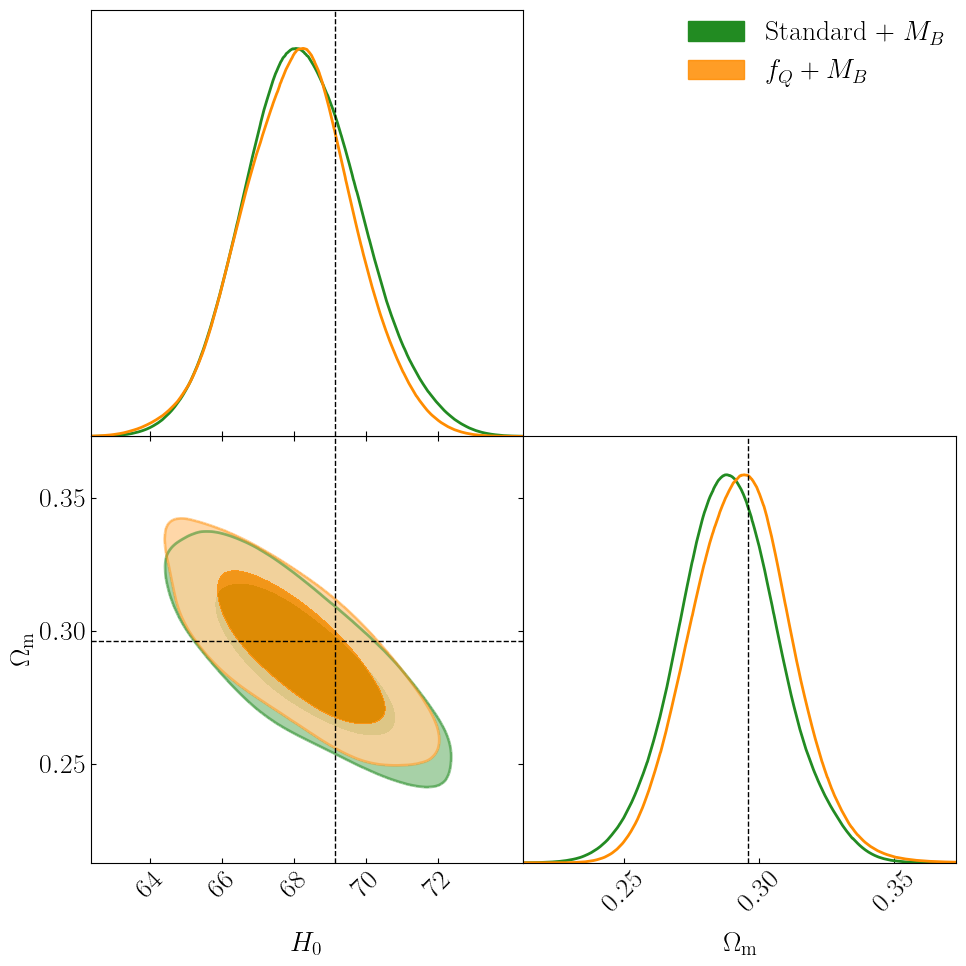

In [93]:
g = plots.get_subplot_plotter(subplot_size=1,width_inch=10, scaling=False)
g.settings.figure_legend_frame = False
g.settings.axes_fontsize=20
g.settings.axes_labelsize=20
g.settings.legend_fontsize=20
g.settings.axis_marker_color = 'black'
g.settings.axis_marker_ls = '--'
g.settings.axis_marker_lw = 1
g.settings.axis_tick_x_rotation = 45
g.triangle_plot([result['sample'] for result in analyzed_results_Pantheon_CC.values()], plot_pars,
    filled=[result['filled'] for result in analyzed_results_Pantheon_CC.values()],
    legend_loc='upper right',
    legend_labels=[result for result in analyzed_results_Pantheon_CC.keys()],
    contour_colors=[result['color'] for result in analyzed_results_Pantheon_CC.values()],
    contour_lws=2,
    markers={k:v for k,v in fiducial_Rocco.items()})    
g.fig.align_ylabels()
g.fig.align_xlabels();
plt.show()